# INTRODUCTION:

## This is my submission for the 'Exploring Data' module for INFO 1201. Within this project, I focused on three seperate themes with multiple data sets/analysis for each theme. Each theme will be introduced as a header to divide each section, and further comments will be provided. Shoutout to Gabrielle M. for the inspiration behind investigating Theme 3. 

### Within this line of code below, I am importing both the 'Pandas' and 'Numpy' libraries to assist with navigating through the CSV Superhero Data file, as well as create nice charts in assistance with the Jupyter kernel. As I import both libraries, I will be renaming them both to 'pan' and 'npy' respectively for easier coding later on. 

In [11]:
import pandas as pan
import numpy as npy
import matplotlib.pyplot as plot
%matplotlib inline
plot.rcParams["figure.figsize"] = (10, 8)

### In this line of code below, I declared a variable that I will title as 'superHero' and initialize it to use the Pandas library to open the CSV file, "superheroData.csv", within the same folder as this file. Additionally, I will use superHero.head() to reveal the first five lines of data within the CSV file to insure that my 'superHero' variable is correctly opening the CSV file or not. 

In [12]:
superHero = pan.read_csv("superheroData.csv")
superHero.head()

,UNIVERSE,page_id,name,urlslug,ID,ALIGN,IS_AVENGER,AVENGER_STATUS,AVENGER_YEAR,EYES,HAIR,SEX,SEXUALITY,ALIVE,APPEARANCES,FIRST_MONTH,FIRST_YEAR,DECEASED,RESURRECTED
0,MARVEL,ND,Artificial being (Earth-616),Artificial_being_(Earth-616),ND,Bad Characters,NO,ND,ND,ND,No Hair,Agender Characters,Heterosexual Characters,Living Characters,2,September,1966,ND,ND
1,MARVEL,ND,Batch-13 (Earth-616),Batch-13_(Earth-616),Secret Identity,Bad Characters,NO,ND,ND,Red Eyes,No Hair,Agender Characters,Heterosexual Characters,Living Characters,ND,February,1995,ND,ND
2,MARVEL,ND,Blockers Bots (Hazards) (Earth-616),Blockers_Bots_(Hazards)_(Earth-616),No Dual Identity,Bad Characters,NO,ND,ND,Green Eyes,No Hair,Agender Characters,Heterosexual Characters,Living Characters,1,ND,ND,ND,ND
3,MARVEL,ND,Carnage (Symbiote) (Earth-616),Carnage_(Symbiote)_(Earth-616),Public Identity,Bad Characters,NO,ND,ND,White Eyes,No Hair,Agender Characters,Heterosexual Characters,Living Characters,61,March,1992,ND,ND
4,MARVEL,ND,Changers (Earth-616),Changers_(Earth-616),Secret Identity,Bad Characters,NO,ND,ND,ND,No Hair,Agender Characters,Heterosexual Characters,Living Characters,1,May,1971,ND,ND


# THEME 1: What is the breakdown of 'gender and sexuality' between the Marvel and DC Universes away from traditional norms of cisgender and heterosexuality? 

### Within this theme, I will be exploring two seperate questions: 1) What is the breakdown of diversity of gender roles and identity between characters in the Marvel and DC Universes, and 2) What is the breakdown of diversity of sexuality betweeen characters in the Marvel and DC Universes? Both these questions explore which comic universe shows more 'gender and sexuality' representation within their comics. 

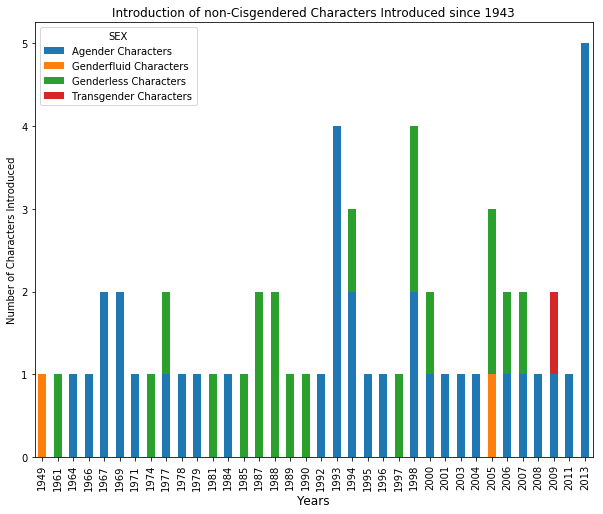

In [13]:
# QUESTION 1, THEME 1 - WHAT IS THE BREAKDOWN OF GENDER/SEX ROLES FOR CHARACTERS BETWEEN THE MARVEL AND DC UNIVERSES
# EXCLUDING CISGENDER ROLES?

# This line of code below will be responsible for removing any pieces of data within the SEX column that has ND 
# (No Data), Male Characters, and Female characters. The way we do this is by initializing one variable (sex_noND)
# to take the superHero variable from earlier, and dropping any value within the SEX column that is equal to ND. 
# Afterwards, I will create another variable (sex_noMale) that takes the variable from before (sex_noND) and drops
# all "Male Characters" fromt the same SEX column. I will do this again to remove all "Female Characters".


sex_noND = superHero.drop(superHero[superHero.SEX == "ND"].index)
sex_noMale = sex_noND.drop(sex_noND[sex_noND.SEX == "Male Characters"].index)
sex_noFemale = sex_noMale.drop(sex_noMale[sex_noMale.SEX == "Female Characters"].index)

year_noND = superHero.drop(superHero[superHero.FIRST_YEAR == "ND"].index)

# Afterwards, I will use the Pandas function for crosstab examination between two seperate columns: one for UNIVERSE
# (to determine which universe these characters come from), and another of SEX (since we are analyzing this variable
# in particular). I will set my index (rows) to be the UNIVERSE column and my columns to be the SEX column with the
# new filters initialized with our previous variables. I added the 'margins = True' for extra All information.

gender = pan.crosstab(index = year_noND["FIRST_YEAR"], columns = [sex_noFemale["SEX"]])
gender.plot(kind = 'bar', stacked = True)
plot.title("Introduction of non-Cisgendered Characters Introduced since 1943")
plot.xlabel("Years", fontsize = 12)
plot.ylabel("Number of Characters Introduced")
plot.show()



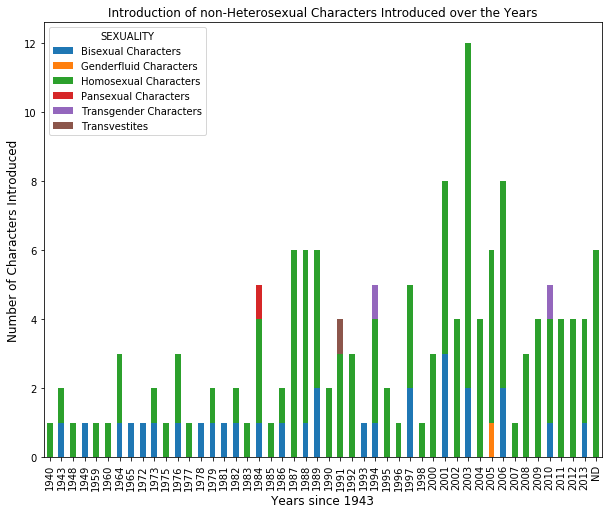

In [14]:
# QUESTION 2, THEME 1 - WHAT IS THE BREAKDOWN OF SEXUAL ORIENTATION ROLES FOR CHARACTERS BETWEEN THE MARVEL AND DC
# UNIVERSES EXCLUSING HETEROSEXUAL ROLES?

# Like the previous code for Question 1, the code below is entirely responsible for creating new variables away from
# 'superHero' to filter out specific pieces of data within a certain column. In this case, I was entirely interested
# in observing all sexual orientation roles that did not include ND (No Data) or "Heterosexual Characters." This was
# done by creating a variable that would drop all "ND" data from the SEXUALITY column within the 'superHero' variable
# and then follow up with a second variable (sexuality_noHetero) and call to drop all "Heterosexual Characters" from
# the SEXUALITY column from the first variable (sexuality_noND). 

sexuality_noND = superHero.drop(superHero[superHero.SEXUALITY == "ND"].index)
sexuality_noHetero = sexuality_noND.drop(sexuality_noND[sexuality_noND.SEXUALITY == "Heterosexual Characters"].index)

# Afterwards, I will use the Pandas function for crosstab examination between the UNIVERSE and SEXUALITY columns. 
# With the current syntax right now since we are only observing two variables, the UNIVERSE variable will be assigned
# to the index position, while the SEXUALITY variable (under the filters from our previous initialized variables) will
# be assigned to the coluns position. Again, I use the 'margins = True' to add the 'All' information at the end.

sexuality = pan.crosstab(superHero["FIRST_YEAR"], sexuality_noHetero["SEXUALITY"])
sexuality.plot(kind = 'bar', stacked = True)
plot.title("Introduction of non-Heterosexual Characters Introduced over the Years")
plot.xlabel("Years since 1943", fontsize = 12)
plot.ylabel("Number of Characters Introduced", fontsize = 12)
plot.show()


# THEME 2: What is the breakdown of 'supernatural abnormalites' between the Marvel and DC Universes?
### Within this theme, I will be exploring questions related to 'supernatural' or 'abnormal' characteristics between characters in the Marvel and DC Universes. The one thing I wish the CSV file had more information on included topics related to Godly/supernatural beings, or alien type, etc. I was pretty restricted to a few variables, so I wanted to explore a few questions in this section. 1) Which universe explores the topic of 'resurrection' more often compared to the other? 2) What is the breakdown of characters between both universes AND their alignment, who have red eyes? 3) What is the breakdown of characters between both universes AND their alignment, who have yellow eyes?

In [23]:
# QUESTION 1, THEME 2 - WHICH UNIVERSE DELVES AND EXPLORES INTO THE IDEA OF 'RESURRECTION' MORE OFTEN? 

# Within this line of code, I opted to use a single line of the Pandas crosstab function which opens the superHero
# variable and assigns the UNIVERSE column/data to the index position and RESURRECTED column/data to the columns
# position. I opted not to create another variable that doesn't include ND values because it would remove ALL DC
# universe data since DC has never interacted with resurrection before. Finally, I created a margins = True to include
# an 'All' data cell.
drop_res = superHero.drop(superHero[superHero.RESURRECTED == 'ND'].index)
res = pan.crosstab(index = superHero["UNIVERSE"], columns = drop_res["RESURRECTED"])
#pan.crosstab(index = drop_res["RESURRECTED"], columns = superHero["UNIVERSE"])
#res.plot(kind = 'pie', autopct = "%1.0f%%", subplots = True, fontsize = 12)

/Users/joshuapaup/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<function matplotlib.pyplot.show(*args, **kw)>

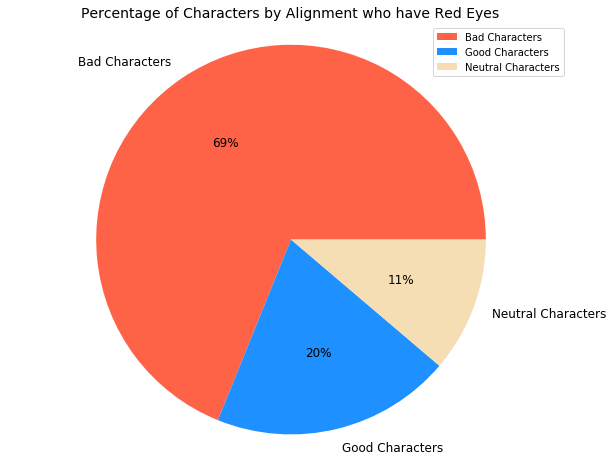

In [21]:
# QUESTION 2, THEME 2 - WHAT IS THE BREAKDOWN OF CHARACTERS WITH ABNORMAL RED EYES ACROSS THE ALIGNMENT SPECTRUM
# BETWEEN THE MARVEL AND DC UNIVERSES?

# Back to what I've done in previous themes, I created two seperate variables that filters data from two seperate
# columns. Since I didn't need to drop multiple items from the same column, I didn't need to do any "nested variables".
# Within the first variable (eye_allRed), I took the superHero variable and rather than drop each eye color one at a
# time within nested variables, I chose to drop ALL eye colors that was not (!=) "Red Eyes". This made for much simpler
# filtering and less code to write. Finally, I created a second variable (align_noND) to filter all 'ND (No Data)' 
# from the ALIGN column. 

eye_allRed = superHero.drop(superHero[superHero.EYES != "Red Eyes"].index)
align_noND = superHero.drop(superHero[superHero.ALIGN == "ND"].index)

# Within this Pandas crosstab function, I assigned the UNIVERSE column from the superHero variable to the index
# position, and then assigned both the EYES and ALIGN columns from their respective new variables we created previously
# to the columns position. I assigned the EYES column to come first to be the "leading" variable over the ALIGN column.

#red = pan.crosstab(index = superHero["UNIVERSE"], columns = [eye_allRed["EYES"], align_noND["ALIGN"]], margins = True)

red = pan.crosstab(index = align_noND["ALIGN"], columns = [eye_allRed["EYES"]])

my_colors = ["tomato", "dodgerblue", "wheat"]
red.plot(kind = 'pie', autopct = "%1.0f%%", subplots = True, fontsize = 12, colors = my_colors)
plot.title("Percentage of Characters by Alignment who have Red Eyes", fontsize = 14)
plot.axes().set_ylabel('')
plot.axis("equal")
plot.show

/Users/joshuapaup/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<function matplotlib.pyplot.show(*args, **kw)>

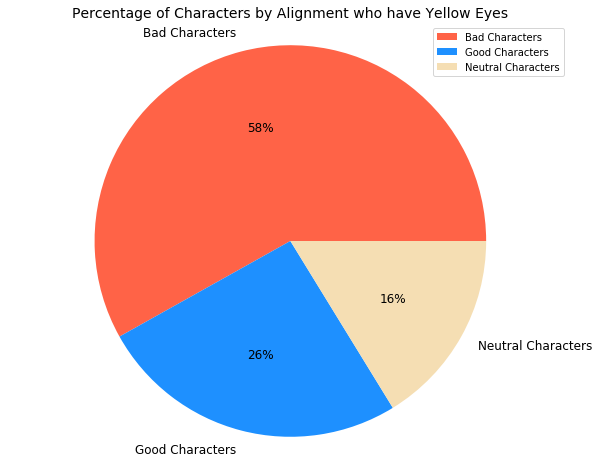

In [22]:
# QUESTION 3, THEME 2 - WHAT IS THE BREAKDOWN OF CHARACTERS WITH ABNORMAL YELLOW EYES ACROSS THE ALIGNMENT SPECTRUM
# BETWEEN THE MARVEL AND DC UNIVERSES?

# For the sake of time, I will not write a similar comment for this piece of code since this section is exactly like
# what I wrote previously. The only differences between this code and the code from the previous question is that
# I examined characters with "Yellow Eyes" exclusively rather than "Red Eyes."

eye_allYellow = superHero.drop(superHero[superHero.EYES != "Yellow Eyes"].index)
align_noND2 = superHero.drop(superHero[superHero.ALIGN == "ND"].index)

my_colors = ["tomato", "dodgerblue", "wheat"]
#yellow = pan.crosstab(index = superHero["UNIVERSE"], columns = [eye_allYellow["EYES"], align_noND2["ALIGN"]])
yellow = pan.crosstab(index = align_noND2["ALIGN"], columns = eye_allYellow["EYES"])
yellow.plot(kind = 'pie', autopct = "%1.0f%%", subplots = True, fontsize = 12, colors = my_colors)
plot.title("Percentage of Characters by Alignment who have Yellow Eyes", fontsize = 14)
plot.axes().set_ylabel('')
plot.axis("equal")
plot.show

# THEME 3: What were the deadliest years for superheroes between both universes in the last 50 years?
### Within this theme, I was focused more on answering one question and exploring subdata within that one question: "What were the deadliest years for superheroes in the last fifty years between the Marvel and DC Universe?" I was primarily interested in mapping out deceased vs. living characters since 1965 between both universes, and then following up with what were the top ten years that had the most superhero deaths between both universes. 

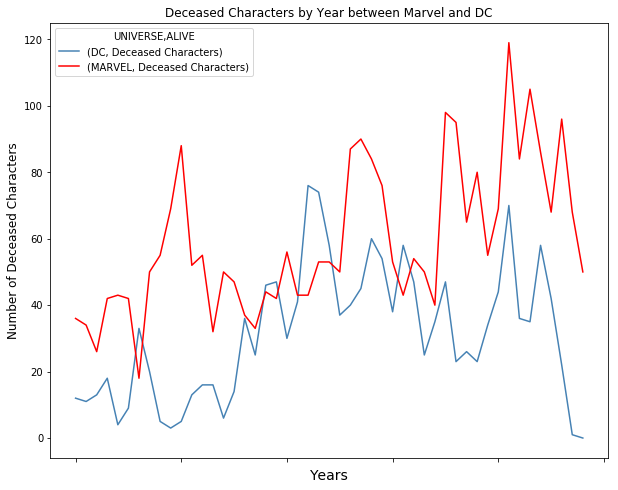

In [24]:
# QUESTION 1, THEME 3 - WHAT WERE THE DEADLIEST YEARS FOR SUPERHEROES IN THE LAST FIFTY YEARS BETWEEN BOTH UNIVERSES?

# Within this line of code, I created two primary variables that filters out data from the ALIVE and FIRST_YEAR columns
# of the superHero variable. Within the first variable, I filtered out all ND (No Data) data under the ALIVE column
# since there was roughly 4,000 characters whose statuses were not given. Within the second variable, I filtered out
# both the ND and all years before 1964 within the FIRST_YEAR column through nested variables.

alive_ND = superHero.drop(superHero[superHero.ALIVE == "ND"].index)
no_living = alive_ND.drop(alive_ND[alive_ND.ALIVE == "Living Characters"].index)

firstyear_ND = superHero.drop(superHero[superHero.FIRST_YEAR == "ND"].index)
domain = firstyear_ND.drop(firstyear_ND[firstyear_ND.FIRST_YEAR <= "1964"].index)

# Within the Pandas crosstab function, I assigned the FIRST_YEAR column from the domain variable to be in the index
# position, and then followed up with assigning the UNIVERSE and ALIVE columns from the domain and alive_ND variables
# to the columns section. I assigned the UNIVERSE column first to be the "leading" variable over the ALIVE column. 

deceased = pan.crosstab(index = domain["FIRST_YEAR"], columns = [domain["UNIVERSE"], no_living["ALIVE"]])

my_colors = ["steelblue", "red", "darkviolet", "forestgreen"]

deceased.plot(kind = 'line', color = my_colors)
plot.title("Deceased Characters by Year between Marvel and DC")
plot.xlabel("Years", fontsize = 14)
plot.ylabel("Number of Deceased Characters", fontsize = 12)
plot.show()

#month_DC.plot(kind = 'line')
#month_Marvel.plot(kind = 'line')
#plot.title("Deadliest Years for each Universe")
#plot.xlabel("Years", fontsize = 12)
#plot.xticks(rotation = 45, fontsize = 8)
#plot.ylabel("Total number of deceased characters", fontsize = 12)
#plot.show()


In [19]:
# SUBQUESTION 1, THEME 3 - WHAT WERE THE TOP TEN DEADLIEST YEARS FOR MARVEL CHARACTERS?

# This section opens up with five nested variables that slowly filter out everything from "Living Characters" in the
# ALIVE column, "DC" characters in the UNIVERSE column, and all "ND (No Data)" values in the UNIVERSE, FIRST_YEAR, and
# ALIVE columns. I couldn't think of better variable names in the moment, so I apologize if they're not appropriate.

universe_Marvel = superHero.drop(superHero[superHero.ALIVE == "Living Characters"].index)
superDerp = universe_Marvel.drop(universe_Marvel[universe_Marvel.UNIVERSE == "DC"].index)
superHerp = superDerp.drop(superDerp[superDerp.UNIVERSE == "ND"].index)
superMerp = superHerp.drop(superDerp[superHerp.FIRST_YEAR == "ND"].index)
superKerp = superMerp.drop(superMerp[superMerp.ALIVE == "ND"].index)

# I will create the month_Marvel variable and assign it to the last variable I created in the previous nested
# variables. I will look at every value within the FIRST_YEAR column of the superKerp variable and complete a 
# value_counts() to filter through every year with the most 'Deceased Characters'. Afterwards, I will print out
# my month_Marvel variable with the top ten values. 

month_Marvel = superKerp["FIRST_YEAR"].value_counts()
print(month_Marvel[0:10])

2006    119
2008    105
2000     98
2011     96
2001     95
1941     93
1992     90
1975     88
1991     87
2009     86
Name: FIRST_YEAR, dtype: int64


In [20]:
# SUBQUESTION 2, THEME 3 - WHAT WERE THE TOP TEN DEADLIEST YEARS FOR DC CHARACTERS?

# Like what I did in the previous subsection, I went through five nested variables that filters out all
# Living Characters, ND (No Data), and Marvel characters from the respective ALIVE, UNIVERSE, and FIRST_YEAR columns
# within each nested variable from the data. 

universe_DC = superHero.drop(superHero[superHero.ALIVE == "Living Characters"].index)
superDerp = universe_DC.drop(universe_DC[universe_DC.UNIVERSE == "MARVEL"].index)
superHerp = superDerp.drop(superDerp[superDerp.UNIVERSE == "ND"].index)
superMerp = superHerp.drop(superDerp[superHerp.FIRST_YEAR == "ND"].index)
superKerp = superMerp.drop(superMerp[superMerp.ALIVE == "ND"].index)

# I will create the month_DC variable and assign it to the last variable I created in the previous nested
# variables. I will look at every value within the FIRST_YEAR column of the superKerp variable and complete a 
# value_counts() to filter through every year with the most 'Deceased Characters'. Afterwards, I will print out
# my month_DC variable with the top ten values. 

month_DC = superKerp["FIRST_YEAR"].value_counts()
print(month_DC[0:10])

1987    76
1988    74
2006    70
1993    60
1996    58
2009    58
1989    58
1994    54
2000    47
1997    47
Name: FIRST_YEAR, dtype: int64
